# Structure of dynamic smart vampires

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from agent.Vampire import SimpleVampire, SmartVampire, SmartDynamicVampire
from agent.Vampire import SMART_VAMPIRE_STRATEGIES_PROB
from model.VampireModel import VampireModel 

In [2]:
def map_motivation(value):
    if value < -2:  
        return 'Cheater'
    elif -2 <= value < 0:
        return 'Prudent'
    elif 0 <= value <= 1:
        return 'Fair'
    elif 1 < value <= 4:
        return 'Generous'
    elif value > 4:
        return 'Martyr'

### Dynamic smart vampires with reproduction

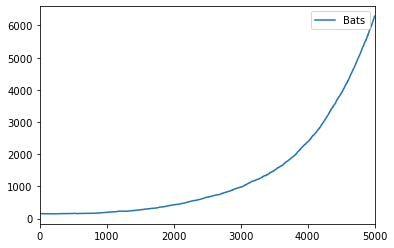

In [3]:
model = VampireModel(
    n_roots = 10,
    root_size = 15,
    max_iteration = 5000,
    food_sharing = True, 
    reproduction = True, 
    reproduction_probability = 0.8,
    vampire_type = SmartDynamicVampire,
)
model.run_model()

df = model.datacollector.get_model_vars_dataframe()
df.plot()

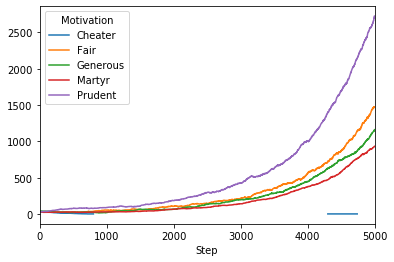

In [4]:
df = model.datacollector.get_agent_vars_dataframe()
df['Motivation'] = df['Motivation'].apply(map_motivation)
results = df.reset_index().groupby(['Motivation', 'Step'])['AgentID'].count()
results.unstack(0).plot()

### Dynamic smart vampires with reproduction and constrained motivation

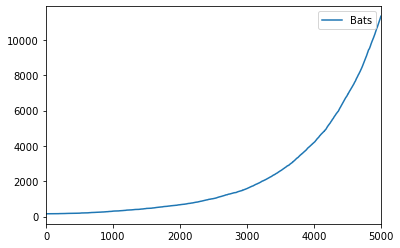

In [5]:
model = VampireModel(
    n_roots = 10,
    root_size = 15,
    max_iteration = 5000,
    food_sharing = True, 
    reproduction = True, 
    reproduction_probability = 0.8,
    vampire_type = SmartDynamicVampire,
    max_motivation = 7
)
model.run_model()

df = model.datacollector.get_model_vars_dataframe()
df.plot()

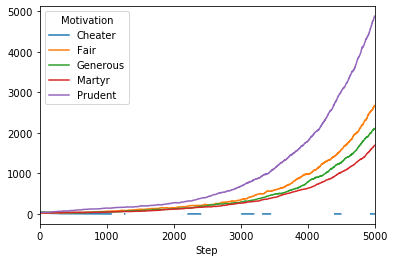

In [6]:
df = model.datacollector.get_agent_vars_dataframe()
df['Motivation'] = df['Motivation'].apply(map_motivation)
results = df.reset_index().groupby(['Motivation', 'Step'])['AgentID'].count()
results.unstack(0).plot()

### Dynamic smart vampires without reproduction

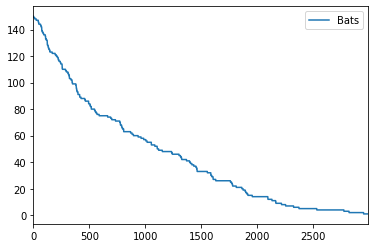

In [7]:
model = VampireModel(
    n_roots = 10,
    root_size = 15,
    max_iteration = 5000,
    food_sharing = True, 
    reproduction = False,
    vampire_type = SmartDynamicVampire
)
model.run_model()

df = model.datacollector.get_model_vars_dataframe()
df.plot()

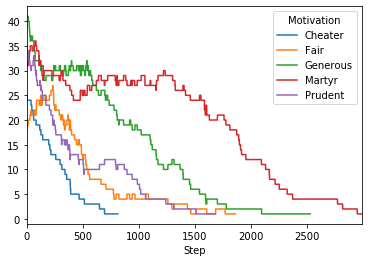

In [8]:
df = model.datacollector.get_agent_vars_dataframe()
df['Motivation'] = df['Motivation'].apply(map_motivation)
results = df.reset_index().groupby(['Motivation', 'Step'])['AgentID'].count()
results.unstack(0).plot()